# Suppose again that $Z=X+Y$. Find $f_{Z}$ if:

## a) $f_{X} = f_{Y} = \left\{\begin{matrix}\frac{x}{2} & 0\leq x \leq 2\\ 0 & otherwise\end{matrix}\right.$

## b) $f_{X} = f_{Y} = \left\{\begin{matrix}\frac{x-3}{2} & 3\leq x \leq 5\\ 0 & otherwise\end{matrix}\right.$

## c) 

### $f_{X} = \left\{\begin{matrix}1/2 & 0\leq x \leq 2\\ 0 & otherwise\end{matrix}\right.$

### $f_{Y} = \left\{\begin{matrix}\frac{x}{2} & 0\leq x \leq 2\\ 0 & otherwise\end{matrix}\right.$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

____

# a)

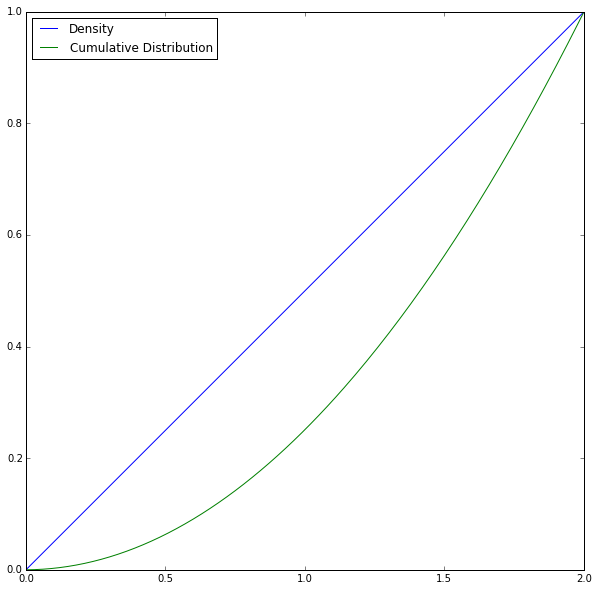

In [6]:
X = np.arange(0, 2.01, 0.01)
fX = X/float(2)
PX = np.cumsum(fX)/sum(fX)
plt.plot(X, fX, label = 'Density')
plt.plot(X, PX, label = 'Cumulative Distribution')
plt.xlim([0,2])
plt.legend(loc = 'upper left')
plt.show()

- We know that if $f_{X}(x)=\frac{x}{2}$ then $F_{X}(x) = \frac{x^{2}}{4}$
    - So, if we want to take a bunch of samples from our distribution, we generate a series of random numbers between 0 and 1, and map them to the x value such that $rand = x^{2}/4$ i.e. we take $\sqrt{4\cdot rand}$

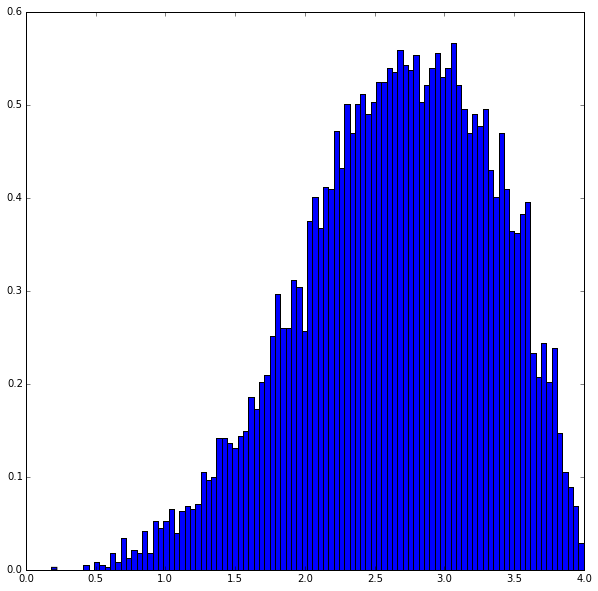

In [15]:
n = 10000
X_sample = np.sqrt(4*np.random.random(size = n))
Y_sample = np.sqrt(4*np.random.random(size = n))
Z_sample = X_sample + Y_sample

plt.hist(Z_sample, bins = 100, normed = True)
plt.show()

# Let's consider two regions: $[0, 2]$ and $[2, 4]$

# When $0\leq z \leq 2$, $0\leq y$ and $0\leq z-y \implies y \leq z$

# So $f_{Z}(z) = \int_{0}^{z}\frac{y}{2}\cdot\frac{z-y}{2}dy = \frac{y^{2}z}{8} - \frac{y^{3}}{12}|^{z}_{0} = \frac{z^{3}}{24}$

# When $2\leq z \leq 4$, $y\leq 2$ and $z-y \leq 2 \implies z-2 \leq y$

# So $f_{Z}(z) = \int_{z-2}^{2}\frac{y}{2}\cdot\frac{z-y}{2}dy = \frac{y^{2}z}{8} - \frac{y^{3}}{12}|^{2}_{z-2} = ... = z - \frac{z^{2}}{24} - \frac{4}{3}$

# Therefore:

# $f_{Z}(z) = \left\{\begin{matrix} \frac{z^{3}}{24} & \text{ ; if }0 \leq z\leq 2\\ z - \frac{z^{2}}{24} - \frac{4}{3} & \text{ ; if }2 \leq z \leq 4 \end{matrix}\right.$

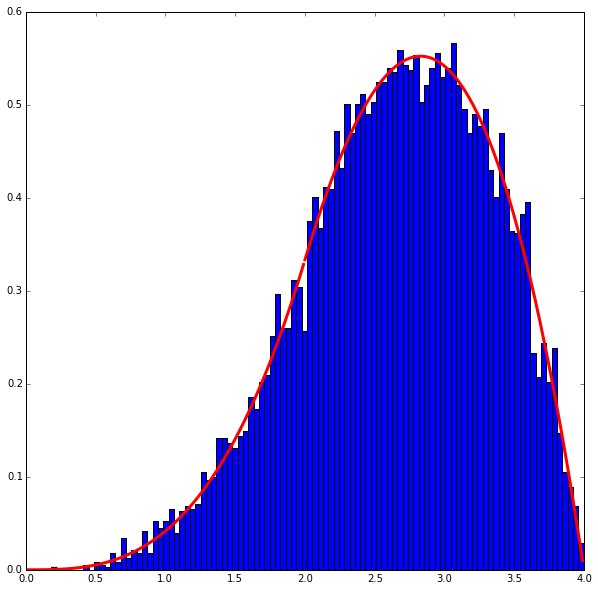

In [18]:
z1 = np.arange(0, 2, 0.01)
fz1 = z1**3/24

z2 = np.arange(2, 4, 0.01)
fz2 = z2 - z2**3/24 - float(4)/3

plt.plot(z1, fz1, color = 'r', lw = 3)
plt.plot(z2, fz2, color = 'r', lw = 3)
plt.hist(Z_sample, bins = 100, normed = True)
plt.show()

______

# b)

# We can see that $f_{x}(x) = \frac{x-3}{2} \implies P(X\leq x) = \frac{(x-3)^{2}}{4}$

# Therefore, to take a random sample of $X$ (and also $Y$, since they have the same distribution) is to map random values between $[0,1]$ to solve for the $x$ value that satisfies $rand = \frac{(x-3)^{2}}{4} \implies x = \sqrt{4\cdot rand}+3$

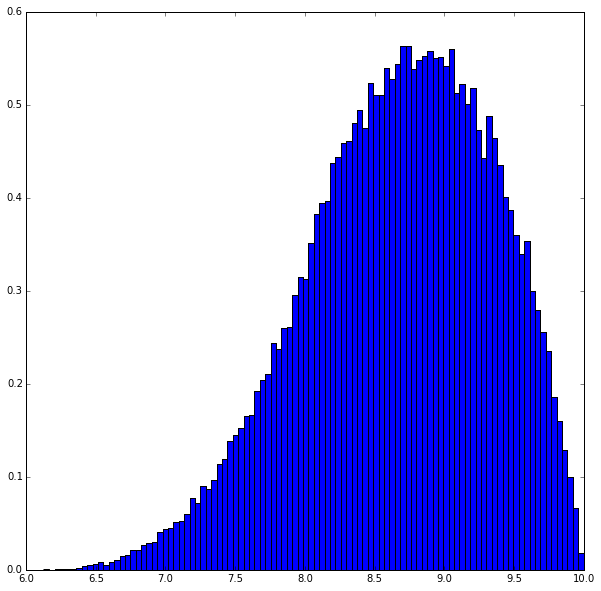

In [24]:
n = 100000
x = np.random.random(size = n)
y = np.random.random(size = n)

X_sample = np.sqrt(4*x)+3
Y_sample = np.sqrt(4*y)+3
Z_sample = X_sample + Y_sample

plt.hist(Z_sample, bins = 100, normed = True)
plt.show()

# So we know that $Z$ is within 6 and 10

# Let's split this into $[6,8]$ and $[8,10]$

## When $6\leq z \leq 8$, we know $3 \leq y$ and $3 \leq z-y \implies y \leq z-3$

# $\implies f_{Z}(z) = \int_{3}^{z-3}\frac{y-3}{2}\frac{(z-y)-3}{2}dy = \frac{1}{24}(z-6)^{3}$

## When $8\leq z \leq 10$, we know $y \leq 5$ and $z-y \leq 5 \implies z-5 \leq y$

# $\implies f_{Z}(z) = \int_{z-10}^{10}\frac{y-3}{2}\frac{(z-y)-3}{2}dy = \frac{1}{24}(-z^{3} + 18z^{2} - 84z + 40)$

# Therefore:

# $f_{Z}(z) = \left\{\begin{matrix} \frac{1}{24}(z-6)^{3} & \text{ ; if }6 \leq z\leq 8\\ \frac{1}{24}(-z^{3} + 18z^{2} - 84z + 40) & \text{ ; if }8 \leq z \leq 10 \end{matrix}\right.$

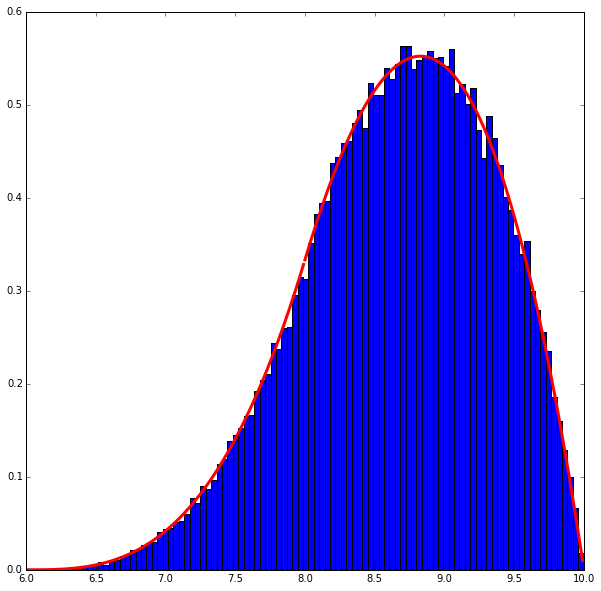

In [26]:
z1 = np.arange(6, 8, 0.01)
fz1 = (z1-6)**3/24

z2 = np.arange(8, 10, 0.01)
fz2 = (float(1)/24)*(-z2**3 + 18*z2**2 - 84*z2 + 40)

plt.plot(z1, fz1, color = 'r', lw = 3)
plt.plot(z2, fz2, color = 'r', lw = 3)
plt.hist(Z_sample, bins = 100, normed = True)
plt.show()

_____

# c)

# $f_{X}(x) = \frac{1}{2} \implies F_{X}(x) = \frac{x}{2}$

# $f_{Y}(y) = \frac{y}{2} \implies F_{Y}(y) = \frac{y^{2}}{4}$

## This means, we can take samples from $X$ by taking random values between 0 and 2 (since this is a uniform distribution)

## We can take samples from $Y$ by taking random values between [0,1] and mapping them as $y = \sqrt{4y}$

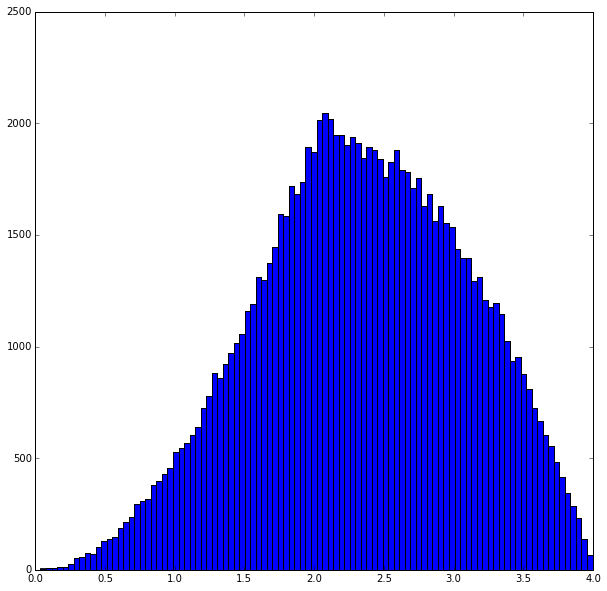

In [29]:
n = 100000
X = np.random.uniform(0, 2, size = n)
Y = np.sqrt(4*np.random.random(size = n))

Z = X+Y
plt.hist(Z, bins = 100)
plt.show()

# We know that $Z$ is within 0 and 4 (since both $X$ and $Y$ are within $[0,2]$)

# Let split it into $[0,2]$ and $[2,4]$

## On $[0,2]$, $0\leq y$ and $0 \leq z-y \implies y \leq z$

## $\implies f_{Z}(z) = \int_{0}^{z}\frac{x}{4}dx = \frac{z^{2}}{8}$

## On $[2, 4]$, $y\leq 2$ and $z-y \leq 2 \implies y \geq z-2$

## $\implies f_{Z}(z) = \int_{2}^{z-2}\frac{x}{4}dx = \frac{z}{2} - \frac{z^{2}}{8}$

# Therefore:

# $f_{Z}(z) = \left\{\begin{matrix} \frac{z^{2}}{8} & \text{ ; if }0 \leq z\leq 2\\ \frac{z}{2} - \frac{z^{2}}{8} & \text{ ; if }2 \leq z \leq 4 \end{matrix}\right.$

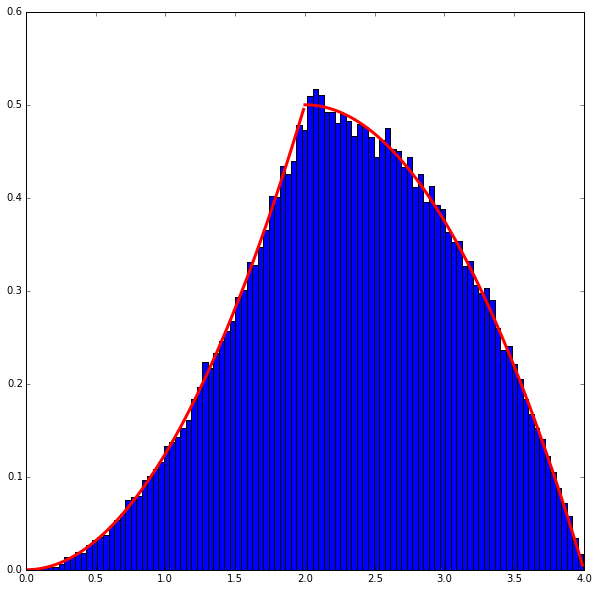

In [31]:
z1 = np.arange(0, 2, 0.01)
fz1 = z1**2/8

z2 = np.arange(2, 4, 0.01)
fz2 = z2/2 - (z2**2)/8

plt.plot(z1, fz1, color = 'r', lw = 3)
plt.plot(z2, fz2, color = 'r', lw = 3)
plt.hist(Z, bins = 100, normed = True)
plt.show()